In [130]:
import requests, json
import numpy as np
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [3]:
html = requests.get("https://www.nfl.com/standings/division/2010/REG")
cont = str(html.content)
standings_raw = ((cont.split("teamRecords")[1][2:]).split("]")[0])+"]"
data = json.loads(standings_raw)

In [4]:
seed_wins = {}
for i in range(16):
    seed_wins["%i"%(i+1)] = []
    
for year in range(2008, 2019):

    site = "https://www.nfl.com/standings/division/%i/REG"%year
    html = requests.get(site)
    content = str(html.content)
    standings_raw = ((content.split("teamRecords")[1][2:]).split("]")[0])+"]"
    standings_data = json.loads(standings_raw)
    
    for team in standings_data:
        wins = team["overallWin"] + 0.5*team["overallTie"]
        seed = team["conferenceRank"]
        seed_wins["%i"%seed].append(wins)

In [208]:
means, stds = [], []
for seed in range(1,17):
    means.append(np.mean(seed_wins["%i"%seed]))
    stds.append(np.std(seed_wins["%i"%seed]))

In [209]:
def heights(wins):
    bins = np.linspace(-0.25, 16.25, 34)
    h, b = np.histogram(wins, bins)
    b = [(b[i]+b[i+1])/2. for i in range(len(h))]
    h_ = np.array(h, dtype=float)
    for i, bval in enumerate(b):
        if bval%1 == 0.5: h_[i] = float(0.5 * np.sum(h[i-1:i+2]))
    return h_, b

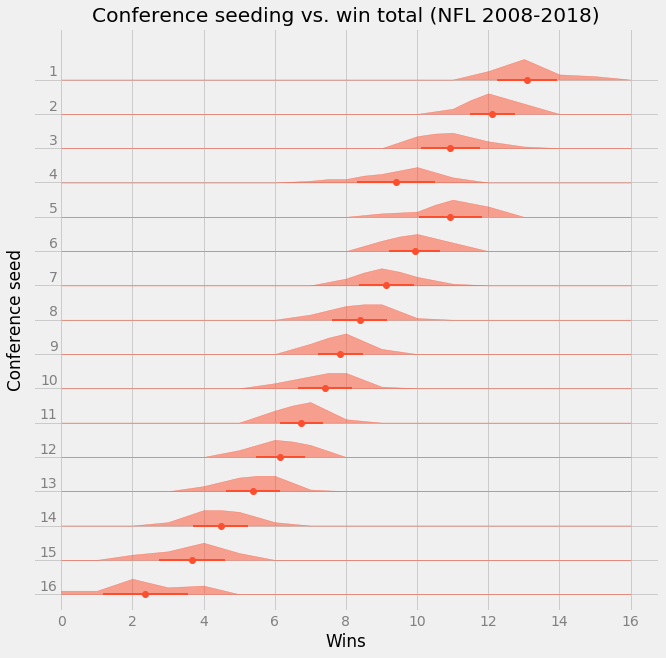

In [229]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,10))

s = 20
ax.set_ylim(0.5,17.5)
ax.set_yticks(np.arange(1,17))
ax.set_yticklabels(["" for i in range(1,17)])
ax.set_ylabel("Conference seed")

ax.set_xticks(np.arange(0,17,2))
ax.set_xticklabels(["%i"%i for i in ax.get_xticks()], color='gray')
ax.set_xlabel("Wins")

ax.set_title("Conference seeding vs. win total (NFL 2008-2018)")

for i in range(1,17):
    y, x = heights(seed_wins["%i"%i])
    ax.fill_between(x, y/s+(17-i), np.zeros_like(y)+(17-i),
                    color='C1', alpha=0.5)

    ax.errorbar([means[16-i]], [i],
                xerr=stds[16-i],
                color='C1', elinewidth=2,
                marker='o')
    
    ax.text(-0.1, (17-i)+0.1, "%i"%i, 
            horizontalalignment='right',
            color='gray', fontsize=14)

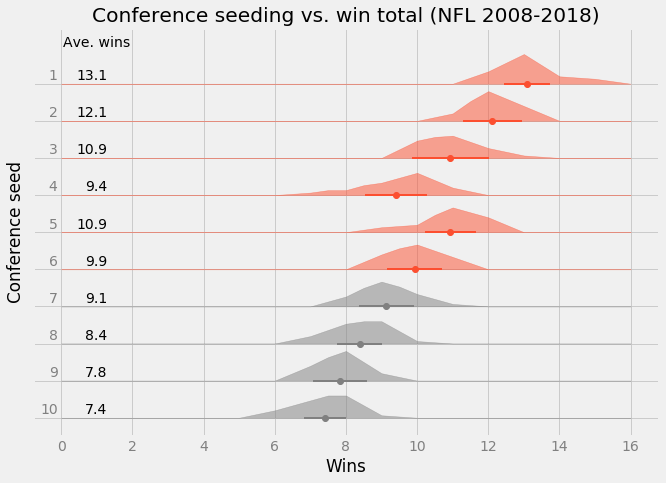

In [256]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10,7))

end = 10
s = 15
ax.set_ylim(0.5,end+1.5)
ax.set_yticks(np.arange(1,end+1))
ax.set_yticklabels(["" for i in range(1,end+1)])
ax.set_ylabel("Conference seed")
ax.text(1, 11, "Ave. wins", horizontalalignment='center')

ax.set_xticks(np.arange(0,17,2))
ax.set_xticklabels(["%i"%i for i in ax.get_xticks()], color='gray')
ax.set_xlabel("Wins")

ax.set_title("Conference seeding vs. win total (NFL 2008-2018)")

for i in range(1,end+1):
    if i < 7: c='C1'
    else: c='grey'
    
    y, x = heights(seed_wins["%i"%i])
    ax.fill_between(x, y/s+(end+1-i), 
                    np.zeros_like(y)+(end+1-i),
                    color=c, alpha=0.5)

    ax.errorbar([means[i-1]], [end+1-i],
                xerr=stds[i],
                color=c, elinewidth=2,
                marker='o')
    
    ax.text(-0.1, (end+1-i)+0.1, "%i"%i, 
            horizontalalignment='right',
            color='gray', fontsize=14)
    ax.text(1.3, (end+1-i)+0.1, "%.1f"%means[i-1],
            horizontalalignment='right')